In [1]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

import datetime

In [20]:
bill_data = pd.read_csv("bills.csv")
venue_data = pd.read_csv("venues.csv")

In [21]:
q2_data = bill_data[['order_take_out_type_label','payment_total_tip','order_duration_seconds','payment_amount','bill_uuid', 'venue_xref_id']].copy()
q2_data = q2_data[q2_data['payment_total_tip'] != 0]

In [22]:
list(set(q2_data['order_take_out_type_label'].to_list()))

['bartab', 'takeout', 'delivery', 'dinein', 'onlineorder']

In [23]:
def split_by_concept(bill_data: pd.DataFrame, venue_data: pd.DataFrame):
    bills = bill_data.merge(venue_data[['venue_xref_id', 'concept']], on='venue_xref_id', how='left')
    concepts = list(set(venue_data["concept"].to_list()))
    data_by_concept = dict()
    for concept in concepts:
        data_by_concept[str(concept)] = bills[bills['concept'] == concept]
    
    return data_by_concept


In [24]:
data_by_concept = split_by_concept(q2_data, venue_data)

In [ ]:
def plot_data(data: pd.DataFrame):
    data['tip_percent'] = data.apply(lambda row: ((row['payment_total_tip'] / row['payment_amount']) * 100) if row['payment_amount'] > 0 else 0, axis=1)
    order_types = list(set(data['order_take_out_type_label'].to_list()))
    payment_amounts = []
    tip_amounts = []
    tip_percents = []
    for order in order_types:
        temp = data[data['order_take_out_type_label'] == order]
        payment_amounts.append(temp['payment_amount'].mean())
        tip_amounts.append(temp['payment_total_tip'].mean())
        tip_percents.append(temp['tip_percent'].mean())

    barWidth = 0.25
    fig = plt.subplots(figsize =(12, 8)) 

    br1 = np.arange(len(payment_amounts)) 
    br2 = [x + barWidth for x in br1] 
    br3 = [x + barWidth for x in br2] 

    plt.bar(br1, payment_amounts, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Payment Amounts') 
    plt.bar(br2, tip_amounts, color ='g', width = barWidth, 
        edgecolor ='grey', label ='Tip Amount') 
    plt.bar(br3, tip_percents, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Tip Percent')
    
    plt.xlabel('Order Types', fontweight ='bold', fontsize = 15)  
    plt.xticks([r + barWidth for r in range(len(payment_amounts))], 
            order_types)

    plt.legend()
    plt.show()

    


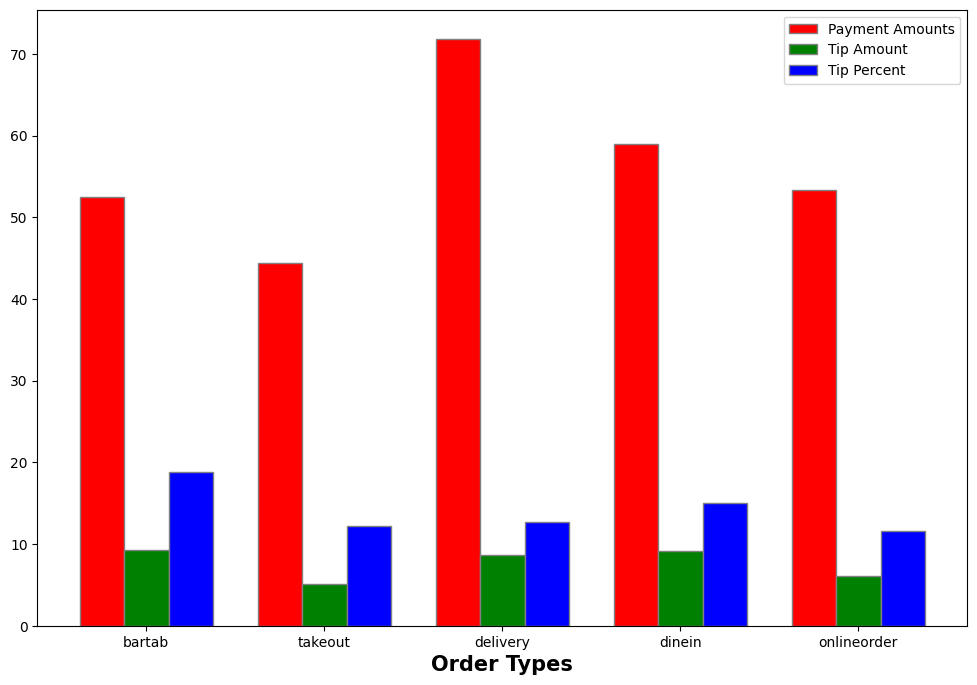

In [37]:
plot_data(q2_data)

{'bartab': (np.float64(52.48953670373754), np.float64(9.288238148963984), np.float64(18.755306611371818)), 'takeout': (np.float64(44.353099192271635), np.float64(5.137476353427127), np.float64(12.211182688954839)), 'delivery': (np.float64(71.80600771869639), np.float64(8.632971698113208), np.float64(12.75045977063966)), 'dinein': (np.float64(58.9339417432537), np.float64(9.13552834910162), np.float64(14.978421982406092)), 'onlineorder': (np.float64(53.36888153477218), np.float64(6.112532853717027), np.float64(11.620933807725875))}
